# Random Forest Classifier based on project titles

First off lets import all the basic libraries and import all the data that Emil has engineered.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle

In [4]:
data = pd.read_csv('../data/processed/02-ks-projects-engineered.csv')

In [5]:
data.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,...,deadline_year,deadline_month,deadline_day,launched_year,launched_month,launched_day,launched_hour,launched_minute,name_length,name_words
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,...,2015,October,Friday,2015,August,Tuesday,12,12,31,5
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,...,2017,November,Wednesday,2017,September,Saturday,4,43,45,8
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,...,2013,February,Tuesday,2013,January,Saturday,0,20,14,3
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,...,2012,April,Monday,2012,March,Saturday,3,24,49,7
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,US,...,2016,April,Friday,2016,February,Friday,13,38,20,3


Before I start training a specific classifier, I want to find out the most used words from the names of the projects.

In [6]:
occurences = dict()
for name in data.name:
    name = name.strip()
    name = name.strip('[",.-!#¤%&/()=?@£$€\]')
    name = name.replace("  ", " ")
    words = name.split(" ")
    for word in words:
        word = word.lower()
        if(word in occurences):
            occurences[word] += 1
        else:
            occurences[word] = 1

In [7]:
dict(sorted(occurences.items(), key=lambda item: item[1], reverse=True)[0:20])

{'the': 90469,
 '-': 46803,
 'a': 44159,
 'of': 32948,
 'and': 22233,
 'for': 20733,
 'to': 18105,
 'in': 15620,
 '&': 15611,
 'new': 12151,
 'album': 11473,
 'film': 10094,
 'project': 9369,
 'by': 8837,
 'book': 8189,
 'your': 7964,
 'with': 7401,
 'game': 7094,
 'art': 6866,
 'on': 6435}

In [8]:
len(data)

329421

As we can see, nearly only third of the projects contain the word "the", which is a lot less than I thought.
However my first approach to train a classifier is by creating binary fields whether the title included specific word or not and create those kind of fields for top 20 words, from which roughly first 10 of them are conjunctions or articles and the last 10 have already a bit more meaning in them.

In [9]:
i = 0
for (key,value) in sorted(occurences.items(), key=lambda item: item[1], reverse=True):
    doesOccure = []
    print(key)
    for title in data.name:
        if(key in title.lower()):
            doesOccure.append(1)
        else:
            doesOccure.append(0)
    data.insert(len(data.columns),"Title Contains "+key, doesOccure, True)
    if(i == 19):
        break
    i+=1

the
-
a
of
and
for
to
in
&
new
album
film
project
by
book
your
with
game
art
on


In [10]:
data.head()

,ID,name,category,main_category,currency,deadline,launched,state,backers,country,...,Title Contains album,Title Contains film,Title Contains project,Title Contains by,Title Contains book,Title Contains your,Title Contains with,Title Contains game,Title Contains art,Title Contains on
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,...,0,0,0,0,0,0,0,0,0,1
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,...,0,0,0,0,0,0,0,0,1,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,...,0,0,0,0,0,0,0,0,0,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,...,1,0,0,0,0,0,0,0,0,0
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,US,...,0,0,0,0,0,0,0,0,0,1


Everything seems to be working, so now its time to delete all of the cells that we did not create (except for usd_goal_real) and see how we do

In [11]:
print(data.columns)
data = data.drop(columns= ["name","launched","deadline","usd_pledged_real","backers","category","country","main_category","currency","deadline_month","deadline_day","deadline_year","launched_year","launched_month","launched_day","launched_hour","launched_minute"])
data.state = data.state.map(dict(failed=0,successful=1))

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'launched', 'state', 'backers', 'country', 'usd_pledged_real',
       'usd_goal_real', 'deadline_year', 'deadline_month', 'deadline_day',
       'launched_year', 'launched_month', 'launched_day', 'launched_hour',
       'launched_minute', 'name_length', 'name_words', 'Title Contains the',
       'Title Contains -', 'Title Contains a', 'Title Contains of',
       'Title Contains and', 'Title Contains for', 'Title Contains to',
       'Title Contains in', 'Title Contains &', 'Title Contains new',
       'Title Contains album', 'Title Contains film', 'Title Contains project',
       'Title Contains by', 'Title Contains book', 'Title Contains your',
       'Title Contains with', 'Title Contains game', 'Title Contains art',
       'Title Contains on'],
      dtype='object')


Now lets split the data up for training and testing (with random_state=1)

In [12]:
X = data.copy()
X = X.drop(columns=["state"])
y= data["state"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [13]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4).fit(X_train, y_train)

In [14]:
#Learned this from the internet!
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1600, num = 200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6, 8, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [16]:
#I googled a way to improve model with multiple threads.
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,n_iter = 10, cv = 3, verbose=5, n_jobs = -1)
# Fit the random search model


rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed: 46.1min remaining: 16.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 56.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25, 31, 36,
                                                      41, 46, 52, 57, 62, 67,
                                                      73, 78, 83, 88, 94, 99,
                                                      104, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [200, 207, 214, 221,
                                                         228, 235, 242, 249,
                                                         256, 263, 270, 277,
                                                         284, 291, 298

In [24]:
print(rf_random.best_estimator_)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [27]:
prediction = rf_random.best_estimator_.predict(X_test)

with open('rf_top20', 'wb') as picklefile:
    pickle.dump(rf_random.best_estimator_,picklefile)

In [30]:
right = 0
false = 0
i = 0
for result in y_test:
    if(result == prediction[i]):
        right += 1
    else:
        false += 1
    i += 1

print(right/(right+false))
X_train.columns

0.6340069009481215


Index(['ID', 'usd_goal_real', 'name_length', 'name_words',
       'Title Contains the', 'Title Contains -', 'Title Contains a',
       'Title Contains of', 'Title Contains and', 'Title Contains for',
       'Title Contains to', 'Title Contains in', 'Title Contains &',
       'Title Contains new', 'Title Contains album', 'Title Contains film',
       'Title Contains project', 'Title Contains by', 'Title Contains book',
       'Title Contains your', 'Title Contains with', 'Title Contains game',
       'Title Contains art', 'Title Contains on'],
      dtype='object')

As it turns out, we can predict with 63% accuracy based on the goal was set and what of the top 20 words the titles contain, which isn't anything special.
Now I'm going to try it all over again, but this time leave all the other data in and  use only half of the training data (because otherwise it would easily go over 24 hours to train it.)

In [34]:
data = pd.read_csv('../data/processed/02-ks-projects-engineered.csv')


i = 0
for (key,value) in sorted(occurences.items(), key=lambda item: item[1], reverse=True):
    doesOccure = []
    for title in data.name:
        if(key in title.lower()):
            doesOccure.append(1)
        else:
            doesOccure.append(0)
    data.insert(len(data.columns),"Title Contains "+key, doesOccure, True)
    if(i == 19):
        break
    i+=1
    
    
data = data.drop(columns= ["name","launched","deadline","usd_pledged_real","backers","category"])
data.state = data.state.map(dict(failed=0,successful=1))
data.launched_month = data.launched_month.map(dict(January=0,February=1,March=2,April=3,May=4,June=5,July=6,August=7,September=8,October=9,November=10,December=11))
data.deadline_month = data.deadline_month.map(dict(January=0,February=1,March=2,April=3,May=4,June=5,July=6,August=7,September=8,October=9,November=10,December=11))
data.launched_day = data.launched_day.map(dict(Monday=0,Tuesday=1,Thursday=2,Wednesday=3,Friday=4,Saturday=5,Sunday=6))
data.deadline_day = data.deadline_day.map(dict(Monday=0,Tuesday=1,Thursday=2,Wednesday=3,Friday=4,Saturday=5,Sunday=6))
#I turn the months and weekdays to numbers so we could save a lot of columns. The result might vary a bit, but not much.
data_dum = pd.get_dummies(data,columns=["main_category","currency","country"])

In [37]:
X = data_dum.copy()
X = X.drop(columns=["state"])
y= data_dum["state"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
X_trainHalf, X_another, y_trainHalf, y_another = train_test_split(X_train, y_train, train_size=0.5, random_state=1)

This time we split up the data one more time so we would use just half of the training data

In [38]:
rf_randomNew = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,n_iter = 10, cv = 2, verbose=5, n_jobs = -1)
rf_randomNew.fit(X_trainHalf, y_trainHalf)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed: 24.6min remaining:  9.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 34.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25, 31, 36,
                                                      41, 46, 52, 57, 62, 67,
                                                      73, 78, 83, 88, 94, 99,
                                                      104, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [200, 207, 214, 221,
                                                         228, 235, 242, 249,
                                                         256, 263, 270, 277,
                                                         284, 291, 298

In [41]:
prediction2 = rf_randomNew.best_estimator_.predict(X_test)

with open('rf_top20_Others', 'wb') as picklefile:
    pickle.dump(rf_randomNew.best_estimator_,picklefile)


right = 0
false = 0
i = 0
for result in y_test:
    if(result == prediction2[i]):
        right += 1
    else:
        false += 1
    i += 1

print(right/(right+false))

0.675068554140063


67.5% accuracy is pretty similar to our last classifier and while its still better than nothing, I would count it rather low.

Next test I'm trying once again to predict based on the title only, but this time we use method described in this article https://stackabuse.com/text-classification-with-python-and-scikit-learn/

In [15]:
data = pd.read_csv('../data/processed/02-ks-projects-engineered.csv')

X = data["name"].copy()
y = data["state"].copy()

In [16]:
documents = []

from nltk.stem import WordNetLemmatizer
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

stemmer = WordNetLemmatizer()

for title in X:
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(title))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karla431\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karla431\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [18]:
print(len(X[0]))

1500


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
X_trainHalf, X_another, y_trainHalf, y_another = train_test_split(X_train, y_train, train_size=0.5, random_state=1)

In [18]:
#I googled a way to improve model with multiple threads.
rf_randomWords = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,n_iter = 10, cv = 3, verbose=5, n_jobs = -1)
# Fit the random search model


rf_randomWords.fit(X_trainHalf, y_trainHalf)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed: 262.8min remaining: 95.6min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 355.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25, 31, 36,
                                                      41, 46, 52, 57, 62, 67,
                                                      73, 78, 83, 88, 94, 99,
                                                      104, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [200, 207, 214, 221,
                                                         228, 235, 242, 249,
                                                         256, 263, 270, 277,
                                                         284, 291, 298

In [20]:
prediction3 = rf_randomWords.best_estimator_.predict(X_test)

with open('rf_1500', 'wb') as picklefile:
    pickle.dump(rf_randomWords.best_estimator_,picklefile)


right = 0
false = 0
i = 0
for result in y_test:
    if(result == prediction3[i]):
        right += 1
    else:
        false += 1
    i += 1

print(right/(right+false))

0.6450463942040131


65% is not bad score at all since the prediction used the title only. Lets try to combine this data back together with our original data.

In [20]:
data = pd.read_csv('../data/processed/02-ks-projects-engineered.csv')

    
data = data.drop(columns= ["name","launched","deadline","usd_pledged_real","backers","category"])
data.state = data.state.map(dict(failed=0,successful=1))
data.launched_month = data.launched_month.map(dict(January=0,February=1,March=2,April=3,May=4,June=5,July=6,August=7,September=8,October=9,November=10,December=11))
data.deadline_month = data.deadline_month.map(dict(January=0,February=1,March=2,April=3,May=4,June=5,July=6,August=7,September=8,October=9,November=10,December=11))
data.launched_day = data.launched_day.map(dict(Monday=0,Tuesday=1,Thursday=2,Wednesday=3,Friday=4,Saturday=5,Sunday=6))
data.deadline_day = data.deadline_day.map(dict(Monday=0,Tuesday=1,Thursday=2,Wednesday=3,Friday=4,Saturday=5,Sunday=6))
#I turn the months and weekdays to numbers so we could save a lot of columns. The result might vary a bit, but not much.
data_dum = pd.get_dummies(data,columns=["main_category","currency","country"])

words = vectorizer.get_feature_names()
i=0
for column in range(1500):
    newColumn = [] 
    for row in range(len(X)):
        newColumn.append(X[row][column])
    data_dum.insert(len(data_dum.columns),"Title_Contains_"+words[i], newColumn, True)
    i+=1

In [21]:
data_dum.columns
X = data_dum.copy()
X = X.drop(columns=["state"])
y= data_dum["state"].copy()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)
X_trainHalf, X_another, y_trainHalf, y_another = train_test_split(X_train, y_train, train_size=0.5, random_state=1)

In [23]:
X_trainHalf.columns

Index(['ID', 'usd_goal_real', 'deadline_year', 'deadline_month',
       'deadline_day', 'launched_year', 'launched_month', 'launched_day',
       'launched_hour', 'launched_minute',
       ...
       'Title_Contains_year', 'Title_Contains_yoga', 'Title_Contains_york',
       'Title_Contains_young', 'Title_Contains_youth',
       'Title_Contains_youtube', 'Title_Contains_zero', 'Title_Contains_zine',
       'Title_Contains_zombie', 'Title_Contains_zone'],
      dtype='object', length=1563)

In [24]:
#I googled a way to improve model with multiple threads.
rf_randomWordsWithOthers = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,n_iter = 10, cv = 3, verbose=5, n_jobs = -1)
# Fit the random search model


rf_randomWordsWithOthers.fit(X_trainHalf, y_trainHalf)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done  22 out of  30 | elapsed: 57.2min remaining: 20.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 100.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=4),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25, 31, 36,
                                                      41, 46, 52, 57, 62, 67,
                                                      73, 78, 83, 88, 94, 99,
                                                      104, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [200, 207, 214, 221,
                                                         228, 235, 242, 249,
                                                         256, 263, 270, 277,
                                                         284, 291, 298

In [25]:
prediction4 = rf_randomWordsWithOthers.best_estimator_.predict(X_test)

In [26]:
with open('rf_1500_Others', 'wb') as picklefile:
    pickle.dump(rf_randomWordsWithOthers.best_estimator_,picklefile)

In [27]:
right = 0
false = 0
i = 0
for result in y_test:
    if(result == prediction4[i]):
        right += 1
    else:
        false += 1
    i += 1

print(right/(right+false))

0.685318789399658


In conclusion we can say that getting over 70% prediction rate is quite hard, but might not be absolutely impossible. However this concludes my tries on training the classifier and therefore I'd say that the best way is to use bag of words method with all other columns we had before, to get the best result.

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,prediction4))
print(classification_report(y_test,prediction4))

[[49775  9223]
 [21876 17953]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.76     58998
           1       0.66      0.45      0.54     39829

    accuracy                           0.69     98827
   macro avg       0.68      0.65      0.65     98827
weighted avg       0.68      0.69      0.67     98827



In [29]:
importances = dict()
numbers = rf_randomWordsWithOthers.best_estimator_.feature_importances_
columns = X_test.columns
j = 0

for i in range(len(numbers)):
    importances[columns[i]] = numbers[i]


#Code because I made a mistake at one moment. In the last run it will be fixed and not needed anymore.
#for i in range(len(numbers)):
#    if(columns[i] == "Title0"):
#        importances["Title"+str(j)] = numbers[i]
#        j+=1
#    else:
#        importances[columns[i]] = numbers[i]

In [30]:
dict(sorted(importances.items(), key=lambda item: item[1], reverse=True)[0:30])

{'usd_goal_real': 0.09219306536528166,
 'name_length': 0.04209049208205831,
 'ID': 0.0392697761952412,
 'launched_minute': 0.03903552467187229,
 'launched_hour': 0.03228350741833535,
 'name_words': 0.029789311875795622,
 'launched_year': 0.02414032802806888,
 'deadline_year': 0.023794321754509188,
 'deadline_month': 0.023750128508643192,
 'launched_month': 0.023637790062887444,
 'launched_day': 0.021179962108037843,
 'deadline_day': 0.020661999105780798,
 'main_category_Technology': 0.008699188681774946,
 'main_category_Theater': 0.008382287419578941,
 'main_category_Music': 0.0073147128069741205,
 'main_category_Comics': 0.006682909332594147,
 'main_category_Fashion': 0.005469667425112649,
 'Title_Contains_album': 0.005077578331394013,
 'main_category_Food': 0.005048901691490514,
 'main_category_Film & Video': 0.0049298328541878085,
 'main_category_Publishing': 0.004895090215552314,
 'Title_Contains_new': 0.004519005378697405,
 'main_category_Games': 0.004284664063318506,
 'Title_Cont

['usd_goal_real']


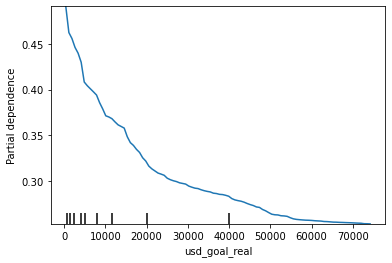

In [31]:
from sklearn.inspection import plot_partial_dependence
features = []
for i in (sorted(importances.items(), key=lambda item: item[1], reverse=True)[0:1]):
    features.append(i[0])
    
print(list(set(features)))
plot_partial_dependence(rf_randomWordsWithOthers, X_trainHalf, list(set(features)))